  ** NYC MTA Turnstile Usage Analysis **

  ** Mohit Ravi **

In [563]:
# Import Libraries
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

** Since the majority of the questions are based on 2013 data, the first objective is to prepare data for 2013 **

In [16]:
## Start date and End Date of 2013 Data
start_date = datetime.date(2013,1,5)
end_date = datetime.date(2013,12,28)
link = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_"
urls = []

# Convert to YYMMDD format
def date_format(date):
    return date.strftime("%y%m%d")

## Take delta of 7 days and store it in a list
this_date = start_date
while this_date <= end_date:
    urls.append(link + date_format(this_date) + ".txt")
    this_date += datetime.timedelta(days=7)

In [45]:
## Read each 2013 weekly data stored as a dataframe in a list
dfs = []
# Store each dataframe in the list, It is important to have no headers since we will concatenating all dataframes into 
# a single large dataframe
for f in urls:
    dfs.append(pd.read_csv(f, header = None))     

In [425]:
# Sanity Check
dfs[0].head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,41,42
0,A002,R051,02-00-00,12-29-12,03:00:00,REGULAR,3929425,1354918,12-29-12,07:00:00,...,12-30-12,03:00:00,REGULAR,3930369.0,1355149.0,12-30-12,07:00:00,REGULAR,3930380.0,1355156.0
1,A002,R051,02-00-00,12-30-12,11:00:00,REGULAR,3930423,1355207,12-30-12,15:00:00,...,12-31-12,11:00:00,REGULAR,3931252.0,1355558.0,12-31-12,15:00:00,REGULAR,3931566.0,1355630.0
2,A002,R051,02-00-00,12-31-12,19:00:00,REGULAR,3932088,1355684,12-31-12,23:00:00,...,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0,01-01-13,23:00:00,REGULAR,3932782.0,1355864.0
3,A002,R051,02-00-00,01-02-13,03:00:00,REGULAR,3932806,1355869,01-02-13,07:00:00,...,01-02-13,15:00:00,REGULAR,3933226.0,1356280.0,01-02-13,19:00:00,REGULAR,3934152.0,1356375.0
4,A002,R051,02-00-00,01-02-13,23:00:00,REGULAR,3934459,1356406,01-03-13,03:00:00,...,01-03-13,11:00:00,REGULAR,3934669.0,1356720.0,01-03-13,15:00:00,REGULAR,3934871.0,1356793.0


In [267]:
# Create a function to convert the 2013 to "Current" format as given in the MTA Turnstile Data Dictionary
def convert(df):
    ind =  df.iloc[:,0:3]
    df1a = pd.concat([ind,df.iloc[:,3:8]],axis=1)
    df2a = pd.concat([ind,df.iloc[:,8:13]],axis=1)
    df3a = pd.concat([ind,df.iloc[:,13:18]],axis=1)
    df4a = pd.concat([ind,df.iloc[:,18:23]],axis=1)
    df5a = pd.concat([ind,df.iloc[:,23:28]],axis=1)
    df6a = pd.concat([ind,df.iloc[:,28:33]],axis=1)
    df7a = pd.concat([ind,df.iloc[:,33:38]],axis=1)
    df8a = pd.concat([ind,df.iloc[:,38:43]],axis=1)
    listofdf = [df1a,df2a,df3a,df4a,df5a,df6a,df7a,df8a]
    def addColumns(l):
        for i in l:
            i.columns = ['C/A','UNIT','SCP','DATE','TIME','DESC','ENTRIES','EXITS']
    addColumns(listofdf)
    full_df = pd.concat([df1a,df2a,df3a,df4a,df5a,df6a,df7a,df8a],axis=0)
    # Sort by C/A, UNIT, SCP, DATE and TIME
    return(full_df.sort_values(by = ['C/A','UNIT','SCP','DATE','TIME']))

In [268]:
## Test function
test = convert(dfs[0])

In [355]:
test.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
2,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0
2,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0
2,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0
2,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0


In [290]:
# Concatenating all dataframes to create a single combined 2013 dataframe
final_2013 = pd.concat([convert(i) for i in dfs], axis = 0)

In [291]:
# Reset Index after Concatenation
final_2013 = final_2013.reset_index()

In [293]:
final_2013.columns

Index([u'index', u'C/A', u'UNIT', u'SCP', u'DATE', u'TIME', u'DESC',
       u'ENTRIES', u'EXITS'],
      dtype='object')

In [294]:
# Drop Reduandant column
final_2013.drop('index', axis = 1, inplace = True)

In [500]:
# Sanity Check
final_2013.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,01-01-13,03:00:00,REGULAR,3932284.0,1355714.0
1,A002,R051,02-00-00,01-01-13,07:00:00,REGULAR,3932299.0,1355721.0
2,A002,R051,02-00-00,01-01-13,11:00:00,REGULAR,3932327.0,1355774.0
3,A002,R051,02-00-00,01-01-13,15:00:00,REGULAR,3932427.0,1355811.0
4,A002,R051,02-00-00,01-01-13,19:00:00,REGULAR,3932662.0,1355849.0


In [501]:
### Add station names. Lookup table can be downloaded from http://web.mta.info/developers/turnstile.html
Station = pd.read_csv('Station Names.csv')

In [502]:
Station.head()

,﻿Remote,Booth,Station,Line Name,Division
0,R001,A060,WHITEHALL ST,R1,BMT
1,R001,A058,WHITEHALL ST,R1,BMT
2,R001,R101S,SOUTH FERRY,R1,IRT
3,R002,A077,FULTON ST,ACJZ2345,BMT
4,R002,A081,FULTON ST,ACJZ2345,BMT


In [503]:
# How many stations are present?
len(Station['Station'].unique())

395

In [504]:
## Check if Booth ID's are unique
(Station['Booth'].value_counts() > 1).any()

False

In [505]:
## Select only Station and Booth Column
Station = Station[['Booth','Station']]

In [506]:
# Rename Booth column to C/A 
Station.rename(columns = {'Booth':'C/A'}, inplace = True)

In [507]:
# Are there are missing Booth ID's
final_2013_data['C/A'].isnull().sum()

0

In [681]:
## Merge the two dataframes to obtain Station Names
final_2013_data = pd.merge(final_2013, Station, on = ['C/A'])
final_2013_data.rename(columns = {'Station':'STATION'}, inplace = True)

In [682]:
# Are there any missing station Names
final_2013_data['STATION'].isnull().sum()

0

In [683]:
### Remove Duplicates rows
final_2013_data = final_2013_data.drop_duplicates()

In [684]:
## Are there are rows with missing date and time?
print final_2013_data['DATE'].isnull().sum()
print final_2013_data['TIME'].isnull().sum()

4527
4527


In [685]:
## Remove rows with missing date and time
final_2013_data = final_2013_data[final_2013_data['DATE'].notnull()]

In [686]:
## Are there any rows with missing Entries and Exits?
print final_2013_data['EXITS'].isnull().sum()
print final_2013_data['ENTRIES'].isnull().sum()

2
2


In [687]:
## Remove rows with missing Entries and Exits
final_2013_data = final_2013_data[final_2013_data['ENTRIES'].notnull()]

In [688]:
# The time counter in this dataset is not uniform. In some cases it starts at 03:00:00 and the counter after 4 hours 
# is 07:00:00, whereas in other cases it starts at 04:00:00 and is followed by 08:00:00.
# The function below clubs them into a common time bin.

def timeclean(t):    
    if t[0:2]=='01' or t[0:2]=='02' or t[0:2]=='03' or t[0:2]=='00':
        return '00'+ t[2:6]+ t[6:9]
    elif t[0:2]=='05' or t[0:2]=='06' or t[0:2]=='07' or t[0:2]=='04':
        return '04'+ t[2:6]+ t[6:9]
    elif t[0:2]=='09' or t[0:2]=='10' or t[0:2]=='11' or t[0:2]=='08':
        return '08'+ t[2:6]+ t[6:9]
    elif t[0:2]=='13' or t[0:2]=='14' or t[0:2]=='15' or t[0:2]=='12':
        return '12'+ t[2:6]+ t[6:9]
    elif t[0:2]=='17' or t[0:2]=='18' or t[0:2]=='19' or t[0:2]=='16':
        return '16'+ t[2:6]+ t[6:9]
    elif t[0:2]=='21' or t[0:2]=='22' or t[0:2]=='23' or t[0:2]=='20':
        return '20'+ t[2:6]+ t[6:9]
    else:
        return t
    
final_2013_data['TIME']=final_2013_data['TIME'].apply(timeclean)

In [689]:
## Lets add a Datetime columns that will make grouping easier.
final_2013_data['DATETIME'] = pd.to_datetime((final_2013_data['DATE'] + ' ' + final_2013_data['TIME'])
                                             , format='%m-%d-%y %H:%M:%S')

In [690]:
### Check if there are any rows with 2012 data, if so remove them.
final_2013_data.loc[final_2013_data['DATETIME'].dt.year == 2012,].shape

(85352, 10)

In [691]:
## Remove 2012 data
final_2013_data = final_2013_data[final_2013_data['DATETIME'].dt.year != 2012]

In [692]:
# Lets define Turnstile as a combination of C/A, UNIT and SCP. This will be useful for grouping.
final_2013_data['TURNSTILE'] = final_2013_data['C/A'] + '-' + final_2013_data['UNIT'] + '-' + final_2013_data['SCP']

In [694]:
# To answer the questions, we need calculate the count per interval instead of the raw turnstile numbers.
# Create variable DIFFERENCE_ENTRIES and DIFFERENCE_EXITS that provides raw counts
final_2013_data['DIFFERENCE_ENTRIES']=final_2013_data.groupby(['TURNSTILE','STATION'],as_index=False)
                                                                ['ENTRIES'].transform(pd.Series.diff)['ENTRIES']
final_2013_data['DIFFERENCE_EXITS']=final_2013_data.groupby(['TURNSTILE','STATION'],as_index=False)
                                                            ['EXITS'].transform(pd.Series.diff)['EXITS']

In [695]:
final_2013_data['DIFFERENCE_ENTRIES'].nlargest(10)
# There are some outrageously large values for DIFFERENCE_ENTRIES. We need to determine a cutoff to eliminate them.

4248833     916848568.0
1983965     793113679.0
9803084     771438080.0
679552      741761585.0
2473009     677792208.0
11463218    652915237.0
5642465     643950309.0
1962040     635056592.0
11948646    532987576.0
2957776     501346575.0
Name: DIFFERENCE_ENTRIES, dtype: float64

In [696]:
# Are there any negative values for DIFFERENCE_ENTRIES?
final_2013_data.loc[final_2013_data['DIFFERENCE_ENTRIES']<0,].shape
# This signifies that the counters are not always increasing. They were reset at some point, that's why we have 
# negative values.

(1973, 13)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x43f304290>]], dtype=object)

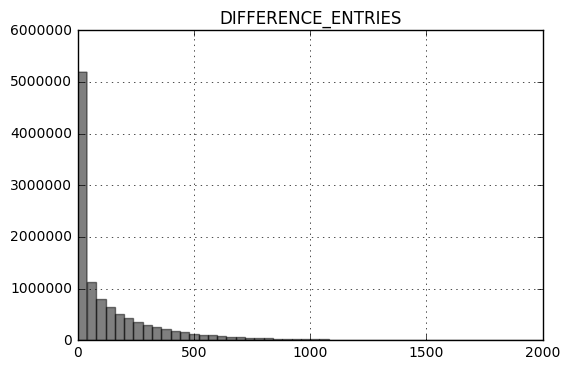

In [697]:
# Histogram of DIFFERENCE_ENTRIES
final_2013_data.loc[:,['DIFFERENCE_ENTRIES']].hist(range = (0,2000), bins = (50), color='k', alpha = 0.5)
# The values start to taper off close to 1000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x62978ded0>]], dtype=object)

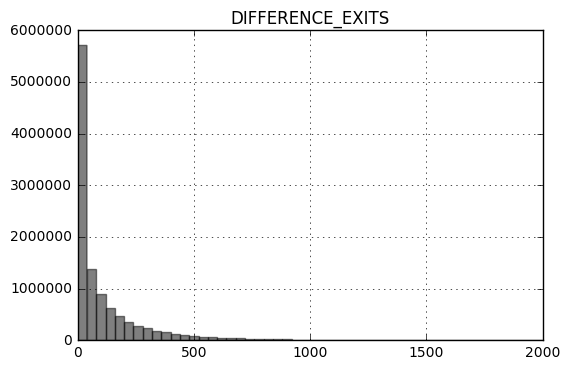

In [698]:
# Histogram of DIFFERENCE_EXITS
final_2013_data.loc[:,['DIFFERENCE_EXITS']].hist(range = (0,2000), bins = (50), color='k', alpha = 0.5)
# Similar to the previous plot

In [699]:
## Lets examine values above 1000
final_2013_data.loc[final_2013_data['DIFFERENCE_ENTRIES'] > 1000,].shape
# There are 190k such instances. To drill down further, we can count values at an interval of 1000

(190009, 13)

In [703]:
# Examine some potential cut-off points

print final_2013_data.loc[(final_2013_data['DIFFERENCE_ENTRIES']>1000) & 
                          (final_2013_data['DIFFERENCE_ENTRIES']< 2000),].shape
print final_2013_data.loc[(final_2013_data['DIFFERENCE_ENTRIES']>2000) & 
                          (final_2013_data['DIFFERENCE_ENTRIES']< 3000),].shape
print final_2013_data.loc[(final_2013_data['DIFFERENCE_ENTRIES']>3000) & 
                          (final_2013_data['DIFFERENCE_ENTRIES']< 4000),].shape
print final_2013_data.loc[(final_2013_data['DIFFERENCE_ENTRIES']>4000) & 
                          (final_2013_data['DIFFERENCE_ENTRIES']< 5000),].shape

(179134, 13)
(9781, 13)
(332, 13)
(63, 13)


It seems like choosing a cutoff point after 1000 or 2000 seems appropriate since the values taper off after 2000.
If we choose 1000 as a cut-off point, we will be throwing out true instances where the number of entries in a 4 hour 
period was indeed in the thousands. Instead taking 2000 as the cut-off point feels like a safe choice where we would eliminate extreme values but at the time keep values between 1000 and 2000.

In [705]:
final_2013_data.loc[final_2013_data['DIFFERENCE_EXITS'] > 2000,].shape

(14242, 13)

In [706]:
# Set them to Null
final_2013_data.loc[final_2013_data['DIFFERENCE_ENTRIES'] < 0, ['DIFFERENCE_ENTRIES']] = np.NaN
final_2013_data.loc[final_2013_data['DIFFERENCE_ENTRIES'] > 2000, ['DIFFERENCE_ENTRIES']] = np.NaN

final_2013_data.loc[final_2013_data['DIFFERENCE_EXITS'] < 0, ['DIFFERENCE_EXITS']] = np.NaN
final_2013_data.loc[final_2013_data['DIFFERENCE_EXITS'] > 2000, ['DIFFERENCE_EXITS']] = np.NaN

In [707]:
# Let's add a variable for BUSYNESS which is a sum of Entry and Exit Counts
final_2013_data['BUSYNESS'] = final_2013_data['DIFFERENCE_ENTRIES'] + final_2013_data['DIFFERENCE_EXITS']

In [708]:
final_2013_data.head()

,C/A,UNIT,SCP,DATE,TIME,DESC,ENTRIES,EXITS,STATION,DATETIME,TURNSTILE,DIFFERENCE_ENTRIES,DIFFERENCE_EXITS,BUSYNESS
0,A002,R051,02-00-00,01-01-13,00:00:00,REGULAR,3932284.0,1355714.0,LEXINGTON AVE,2013-01-01 00:00:00,A002-R051-02-00-00,NaN,NaN,NaN
1,A002,R051,02-00-00,01-01-13,04:00:00,REGULAR,3932299.0,1355721.0,LEXINGTON AVE,2013-01-01 04:00:00,A002-R051-02-00-00,15.0,7.0,22.0
2,A002,R051,02-00-00,01-01-13,08:00:00,REGULAR,3932327.0,1355774.0,LEXINGTON AVE,2013-01-01 08:00:00,A002-R051-02-00-00,28.0,53.0,81.0
3,A002,R051,02-00-00,01-01-13,12:00:00,REGULAR,3932427.0,1355811.0,LEXINGTON AVE,2013-01-01 12:00:00,A002-R051-02-00-00,100.0,37.0,137.0
4,A002,R051,02-00-00,01-01-13,16:00:00,REGULAR,3932662.0,1355849.0,LEXINGTON AVE,2013-01-01 16:00:00,A002-R051-02-00-00,235.0,38.0,273.0


In [335]:
### Save the dataframe in a csv file
final_2013_data.to_csv('/Users/mohitravi/Desktop/final_2013_data.csv', index = False)

** Question - 1: Which station has the most number of units as of today? ** 

In [440]:
## Reading the latest file from MTA Turnstile Website
df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_171230.txt')

In [441]:
# Let's take today's date as 28th December 2017
df1 = df1.set_index('DATE').sort_index(ascending = False)

In [442]:
df1.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,TIME,DESC,ENTRIES,EXITS
DATE,,,,,,,,,,
12/29/2017,TRAM2,R469,00-03-01,RIT-ROOSEVELT,R,RIT,20:00:00,RECOVR AUD,2446002,27420
12/29/2017,N533,R129,02-06-02,BERGEN ST,FG,IND,20:00:00,REGULAR,1294786,915150
12/29/2017,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,23:00:00,REGULAR,2287165,3706802
12/29/2017,R515,R095,00-00-01,ASTORIA DITMARS,NQW,BMT,19:00:00,REGULAR,2287075,3706372
12/29/2017,N078,R175,01-03-01,14 ST,ACEL,IND,00:00:00,REGULAR,12182716,14509692


In [443]:
# Selecting only 28th December 2017
df1_today = df1.loc['12/28/2017',]

In [444]:
# Select only relevant columns
df1_today = df1_today[['UNIT','STATION']]

In [349]:
# Select only unique units for each station
df1_today = df1_today.drop_duplicates()

In [357]:
# Group by Station to find the count of distinct units
df1_today.groupby('STATION')['UNIT'].agg('count').sort_values(ascending = False).head(1)

STATION
23 ST    6
Name: UNIT, dtype: int64

In [351]:
df1_today.loc[df1_today['STATION'] == '23 ST','UNIT']

DATE
12/28/2017    R453
12/28/2017    R203
12/28/2017    R111
12/28/2017    R131
12/28/2017    R083
12/28/2017    R190
Name: UNIT, dtype: object

23 ST is the station with the most number of distinct units as of 28th December 2017. Also, In this data file - 23 ST, 23 ST-5 AVE and 23 ST-6 AVE are all named as 23 ST, but in the MTA Data dictionary they are separate.

In [352]:
# Checking to see if 23 ST-6 AVE exists.
df1_today.loc[df1_today['STATION'] == '23 ST-6 AVE','UNIT']

Series([], Name: UNIT, dtype: object)

** Question - 2: What is the total number of entries & exits across the subway system for August 1, 2013? **

In [849]:
# Let's consider DESC as REGULAR unless specified.
final_2013_REG = final_2013_data[final_2013_data['DESC'] == 'REGULAR']

In [710]:
final_2013_REG.shape

(9710896, 14)

In [711]:
# Take Values only for 1st Aug 2013
dfAug1 = final_2013_REG[final_2013_REG['DATE'] == '08-01-13']

In [712]:
# Sum of all Delta of Entries and Exits
dfAug1['DIFFERENCE_ENTRIES'].sum()

5387519.0

In [713]:
dfAug1['DIFFERENCE_EXITS'].sum()

4194568.0

In [714]:
print 'The total number of entries & exits across the subway system for August 1, 2013 is', 
dfAug1['DIFFERENCE_ENTRIES'].sum() + dfAug1['DIFFERENCE_EXITS'].sum()

The total number of entries & exits across the subway system for August 1, 2013 is  9582087.0


** Question - 3: Let’s define the busy-ness as sum of entry & exit count. What station was the busiest on August 1, 2013? What turnstile was the busiest on that date? **

In [715]:
# Busiest Station on 1st Aug
dfAug1.groupby('STATION')['BUSYNESS'].sum().sort_values(ascending = False).head(1)

STATION
34 ST-PENN STA    305084.0
Name: BUSYNESS, dtype: float64

In [716]:
# Busiest Turnstile on 1st Aug
dfAug1.groupby('TURNSTILE')['BUSYNESS'].sum().sort_values(ascending = False).head(1)

TURNSTILE
R533-R055-00-03-00    9881.0
Name: BUSYNESS, dtype: float64

In [747]:
# Which station does the turnstile belong to?
dfAug1.loc[dfAug1['TURNSTILE'] == 'R533-R055-00-03-00',['STATION']].head(1)

,STATION
11324151,MAIN ST


The busiest Station was 34 ST-PENN STA and the busiest turnstile was R533-R055-00-03-00 which is located in
MAIN ST.

** Question - 4: What stations have seen the most usage growth/decline in 2013? **

In [748]:
# Let's define usage as average busyness per week. We can caluclate usage for each station and take mean of percent
# change to obtain growth rate

In [851]:
# Create a new variable to get week of year from Date
final_2013_REG['WEEK_OF_YEAR'] = final_2013_REG['DATETIME'].dt.weekofyear

/Users/mohitravi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [878]:
# Group by Station and Month on Busyness
final_2013_REG.groupby(['STATION','WEEK_OF_YEAR'])['BUSYNESS'].agg('mean').head(5)

STATION  WEEK_OF_YEAR
1 AVE    1               627.171014
         2               709.086747
         3               731.256471
         4               661.962963
         5               719.593458
Name: BUSYNESS, dtype: float64

In [862]:
# Convert the results of the group by statement to a dataframe to calculate percent change
df_Usage = final_2013_REG.groupby(['STATION','WEEK_OF_YEAR'])['BUSYNESS'].agg('mean').reset_index()

In [863]:
df_Usage = df_Usage.sort_values(by = ['STATION','WEEK_OF_YEAR'])
df_Usage.head(5)

,STATION,WEEK_OF_YEAR,BUSYNESS
0,1 AVE,1,627.171014
1,1 AVE,2,709.086747
2,1 AVE,3,731.256471
3,1 AVE,4,661.962963
4,1 AVE,5,719.593458


In [864]:
# In cases, where there is a division of 1 and 0, it will raise errors. Therefore, convert 0 to 0.1 for BUSYNESS.
df_Usage.loc[df_Usage['BUSYNESS'] == 0,'BUSYNESS'] = 0.1
# Calculate Percent Change
df_Usage['PCT_CHANGE'] = df_Usage.groupby('STATION')['BUSYNESS'].pct_change()

In [867]:
# Take mean of Percent Change for each station
# Top 10 growing stations. Looks like BEACH 90 ST was the highest growing station.
df_Usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending = False).head(10)

STATION
BEACH 90 ST        9.773748
WAKEFIELD-241      4.996357
BEACH 98 ST        3.985627
ORCHARD BEACH      1.900805
BEACH 105 ST       1.611306
AQUEDUCT TRACK     1.599532
KNICKERBOCKER      1.429541
ROCKAWAY PK 116    1.192239
SMITH-9 ST         1.024946
BROAD CHANNEL      0.429835
Name: PCT_CHANGE, dtype: float64

In [874]:
# Top 10 low growth stations
# AQUEDUCT-N CNDT has the lowest growth percentage
df_Usage.groupby('STATION')['PCT_CHANGE'].mean().sort_values(ascending = False).tail(10)

STATION
FT HAMILTON PKY   -0.002157
4 AVE             -0.002469
BEDFORD AVE       -0.002560
FRANKLIN AVE      -0.003320
FRESH POND ROAD   -0.003871
9 AVE             -0.004028
NASSAU AV         -0.004486
GROVE STREET      -0.004915
AQUEDUCT-N CNDT   -0.006626
LGA AIRPORT CTB         NaN
Name: PCT_CHANGE, dtype: float64

In [875]:
# Let's investigate 90 BEACH ST. We can see that BUSYNESS picks up from week 22 onwards.
df_Usage.loc[df_Usage['STATION'] == 'BEACH 90 ST', ]

,STATION,WEEK_OF_YEAR,BUSYNESS,PCT_CHANGE
7508,BEACH 90 ST,1,0.028571,NaN
7509,BEACH 90 ST,2,0.015873,-0.444444
7510,BEACH 90 ST,3,0.055556,2.500000
7511,BEACH 90 ST,4,0.103175,0.857143
7512,BEACH 90 ST,5,0.015873,-0.846154
7513,BEACH 90 ST,6,0.036232,1.282609
7514,BEACH 90 ST,7,0.015152,-0.581818
7515,BEACH 90 ST,8,0.032520,1.146341
7516,BEACH 90 ST,9,0.100000,2.075000
7517,BEACH 90 ST,10,0.163793,0.637931


After further research online, this station was found to be not operating under full capacity due to the effects of hurricane Sandy the previous year and it was restored back again on May 30th 2013.

http://www.nytimes.com/2013/05/31/nyregion/the-a-line-returns-to-the-rockaways-mostly-for-the-better.html

"After Hurricane Sandy hit and destroyed the long stretch of the IND Rockaway Line, this was a terminal of the 
temporary H shuttle until May 30, 2013, when the A train and the Rockaway Park Shuttle were restored to the Rockaways.
H trains terminated on the northbound track, because the Rockaway Park Shuttle was not in operation
and A service was cut to Howard Beach–JFK Airport."

In [882]:
# Why LGA AIRPORT CTB has Null value ?
df_Usage.loc[df_Usage['STATION'] == 'LGA AIRPORT CTB', ] 
# This station data is only present for a week.

,STATION,WEEK_OF_YEAR,BUSYNESS,PCT_CHANGE
14296,LGA AIRPORT CTB,50,480.214286,NaN


The station that has the seen the most growth is BEACH 90 ST.

The station that has seen the least growth is AQUEDUCT-N CNDT.

** Question - 5: What dates in 2013 are the least busy? Could you identify days in 2013 on which stations were not operating at full capacity or closed entirely? **

In [907]:
# Group by Date and take mean of busyness per day
final_2013_REG.groupby('DATE')['BUSYNESS'].mean().sort_values().head(3)

DATE
12-25-13    125.694487
11-28-13    156.846640
02-09-13    157.059104
Name: BUSYNESS, dtype: float64

The top 3 days that were least busy are:

1) 25th Decemeber 2013 - Christmas Holiday <br/>
2) 28th November 2013 - Thanksgiving Holiday <br/>
3) 9th Feb 2013 - There was a major snow storm on this day. More details can be found here:
https://mobile.nytimes.com/2013/02/10/nyregion/winter-storm-northeast.html?pagewanted=all&

In [898]:
# Create a variable to calculate day of week from Date
final_2013_REG['Day_of_Week'] = final_2013_REG['DATETIME'].dt.weekday_name

/Users/mohitravi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [900]:
# What is the average busyness per day of the week?
final_2013_REG.groupby('Day_of_Week')['BUSYNESS'].mean().sort_values()

Day_of_Week
Sunday       187.371471
Saturday     231.062063
Monday       330.202750
Tuesday      355.642474
Thursday     359.815426
Friday       360.823170
Wednesday    361.394200
Name: BUSYNESS, dtype: float64

We can see the Sunday and Saturday are days when stations are not operating on full capacity

** Question - 6: Plot the daily row counts for data files in Q3 2013. **

In [940]:
# Take only Q3 Data
dfQ3 = final_2013_REG[(final_2013_REG['DATE'] >= '07-01-13') & (final_2013_REG['DATE'] <= '09-30-13')]

In [947]:
# calculate row counts for each data
Row_counts = dfQ3.sort_values('DATE').groupby('DATE')['DATE'].agg('count')

([<matplotlib.axis.XTick at 0x7f44e2c50>,
 <a list of 7 Text xticklabel objects>)

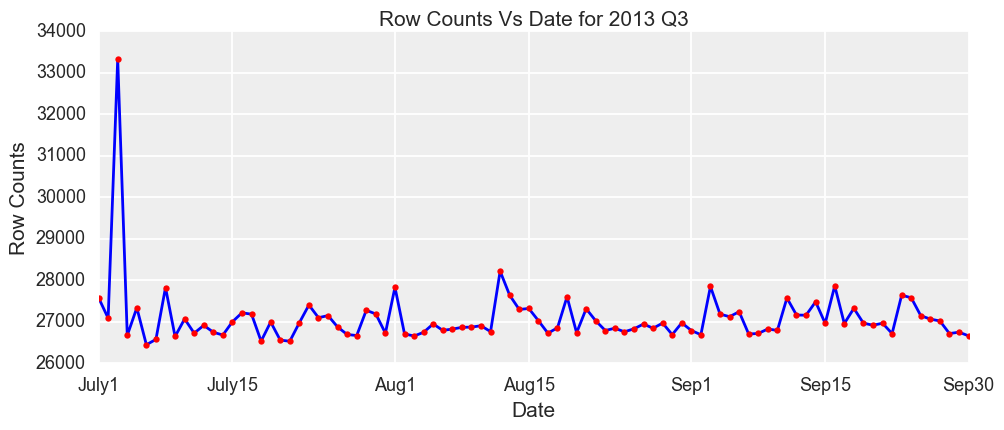

In [1121]:
# Plot row counts Vs Date for 2013 Q3
dfQ3.sort_values('DATE').groupby('DATE')['DATE'].agg('count').plot( color = 'b', marker = '.', markerfacecolor = 'r')
plt.style.use('bmh')
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Row Counts', fontsize = 15)
plt.title('Row Counts Vs Date for 2013 Q3', fontsize = 15)
plt.xticks(['07-01-13','07-15-13','08-01-13','08-15-13','09-01-13','09-15-13','09-30-13'], 
                                           ['July1','July15','Aug1','Aug15','Sep1','Sep15','Sep30'])

In [987]:
#print(plt.style.available)

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [1054]:
# Looks like there is a spike in the beginning of July 2013. Let's examine it
dfQ3.sort_values('DATE').groupby('DATE')['DATE'].agg('count').head(5)

DATE
2013-07-01    27583
2013-07-02    27090
2013-07-03    33332
2013-07-04    26675
2013-07-05    27341
Name: DATE, dtype: int64

There is a slightly larger row count just a day before the 4th of July Holiday.

** Question - 7: Plot the daily total number of entries & exits across the system for Q3 2013 **

In [1089]:
# Group by total entries and exits on date
dfQ3_Entries_Exits = dfQ3.sort_values('DATE').groupby('DATE')['DIFFERENCE_ENTRIES','DIFFERENCE_EXITS'].agg('sum')

In [1107]:
# Rename Columns
dfQ3_Entries_Exits.rename(columns = {'DIFFERENCE_ENTRIES':'Total Entries','DIFFERENCE_EXITS':'Total Exits'}
                                      ,inplace=True)

([<matplotlib.axis.YTick at 0x93af12f50>,
 <a list of 10 Text yticklabel objects>)

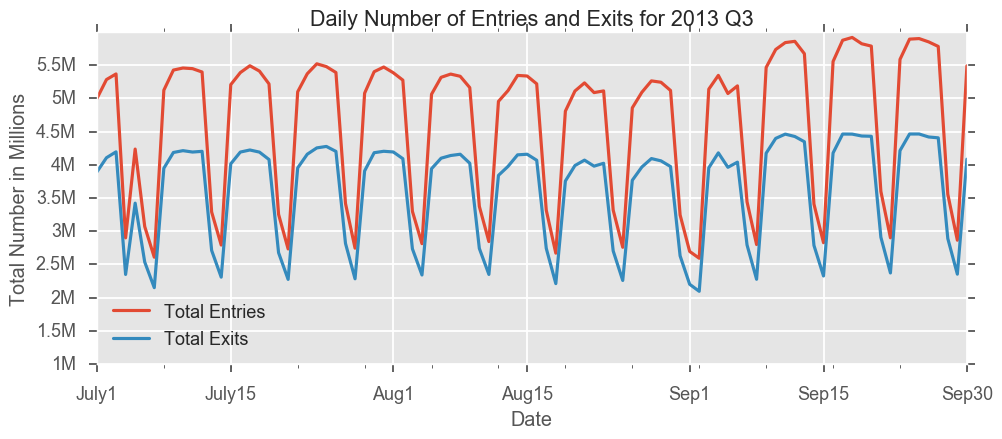

In [1256]:
# plotting
plt.style.use('seaborn-talk')
dfQ3_Entries_Exits.plot()
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)
plt.xlabel('Date')
plt.ylabel('Total Number in Millions')
plt.title('Daily Number of Entries and Exits for 2013 Q3')
plt.xticks(['07-01-13','07-15-13','08-01-13','08-15-13','09-01-13','09-15-13','09-30-13'], 
                                          ['July1','July15','Aug1','Aug15','Sep1','Sep15','Sep30'])
plt.yticks((range(1000000,6000000,500000)),
           ['1M','1.5M','2M','2.5M','3M','3.5M','4M','4.5M','5M','5.5M','6M'])

We can see a pattern here where the daily ridership drops down on weekends, but picks up again on weekdays.

** Question - 8: Plot the mean and standard deviation of the daily total number of entries & 
exits for each month in Q3 2013 for station 34 ST-PENN STA **

In [1125]:
# Create a new column to get Month from Date
dfQ3['MONTH'] = dfQ3['DATE'].dt.month

/Users/mohitravi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1186]:
# Select Only PENN Station from 2013 Q3
df_PENN = dfQ3[dfQ3['STATION'] == '34 ST-PENN STA']
df_PENN = df_PENN.sort_values('MONTH')

In [1188]:
# Get sum of daily entries and exits for PENN Station
Daily_Counts_PENN = df_PENN.groupby(['MONTH','DATE'])['DIFFERENCE_ENTRIES','DIFFERENCE_EXITS'].agg('sum')
Daily_Counts_PENN = Daily_Counts_PENN.reset_index()

In [1191]:
# Get Mean and Std of daily entries and exits
Daily_Counts_PENN.groupby('MONTH').agg(['mean','std'])

DIFFERENCE_ENTRIES               DIFFERENCE_EXITS              
                    mean           std             mean           std
MONTH                                                                
7          138022.354839  37087.066792    119607.967742  29702.377214
8          136282.193548  35918.308022    116488.225806  28255.928864
9          133977.133333  37913.972531    114923.933333  30366.084447

In [1218]:
# Clean dataframe for plotting
Daily_Counts_PENN_Clean = Daily_Counts_PENN.groupby('MONTH').agg(['mean','std'])
Daily_Counts_PENN_Clean.columns = ['Total_Entries_Mean','Total_Entries_Std','Total_Exits_Mean','Total_Exits_Std']
Daily_Counts_PENN_Clean = Daily_Counts_PENN_Clean.reset_index()

In [1219]:
Daily_Counts_PENN_Clean

,MONTH,Total_Entries_Mean,Total_Entries_Std,Total_Exits_Mean,Total_Exits_Std
0,7,138022.354839,37087.066792,119607.967742,29702.377214
1,8,136282.193548,35918.308022,116488.225806,28255.928864
2,9,133977.133333,37913.972531,114923.933333,30366.084447


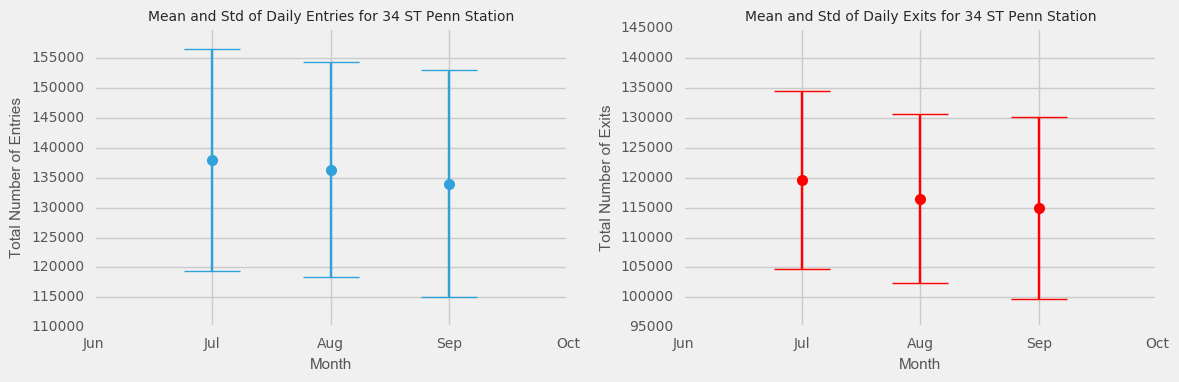

In [1289]:
### Plotting for Entries
plt.subplot(1,2,1)
plt.style.use('seaborn-notebook')
fig = plt.gcf()
fig.set_size_inches(12, 4, forward=True)
Month = [7,8,9]
Mean_of_Entries = Daily_Counts_PENN_Clean['Total_Entries_Mean'] 
Std_of_Entries = Daily_Counts_PENN_Clean['Total_Entries_Std']/2

(_, caps, _) = plt.errorbar(Month, Mean_of_Entries, yerr =  Std_of_Entries, fmt='o', markersize=8, capsize=20)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks([6,7,8,9,10],['Jun','Jul','Aug','Sep','Oct'])
plt.yticks(range(110000,160000,5000))
plt.xlabel('Month')
plt.ylabel('Total Number of Entries')
plt.title('Mean and Std of Daily Entries for 34 ST Penn Station', fontsize = 10)
#plt.show()

### Plotting for Exits
plt.subplot(1,2,2)
Month = [7,8,9]
Mean_of_Exits = Daily_Counts_PENN_Clean['Total_Exits_Mean'] 
Std_of_Exits = Daily_Counts_PENN_Clean['Total_Exits_Std']/2

(_, caps, _) = plt.errorbar(Month, Mean_of_Exits, yerr =  Std_of_Exits, c = 'r',fmt='o', markersize=8, capsize=20)

for cap in caps:
    cap.set_markeredgewidth(1)

plt.xticks([6,7,8,9,10],['Jun','Jul','Aug','Sep','Oct'])
plt.yticks(range(95000,150000,5000))
plt.xlabel('Month')
plt.ylabel('Total Number of Exits')
plt.title('Mean and Std of Daily Exits for 34 ST Penn Station', fontsize = 10)
plt.tight_layout()
plt.show()

The dots at the center describe the mean, whereas the length of the lines specifies the standard deviation.
For example, if we take Total Entries for July, the dot is at around 137,000 which is the mean. Whereas, the length of the line is approxiamtely 36,000 (156,000 - 120,000) which is the standard deviation value.

** Question - 9: Plot 25/50/75 percentile of the daily total number of entries & exits for each month in Q3 2013 for station 34 ST-PENN STA **

In [1296]:
# A boxplot is perfect to visualize the 25th, 50th and 75th Percentile.
# The daily entry and exit numbers for PENN Station was created before. Use the same dataframe.
Daily_Counts_PENN.head()

,MONTH,DATE,DIFFERENCE_ENTRIES,DIFFERENCE_EXITS
0,7,2013-07-01,170012.0,134056.0
1,7,2013-07-02,162772.0,138285.0
2,7,2013-07-03,162671.0,162604.0
3,7,2013-07-04,75395.0,85395.0
4,7,2013-07-05,137555.0,117782.0


In [1329]:
# Create data for Entries
July_Entries = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 7,['DIFFERENCE_ENTRIES']]
Aug_Entries = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 8,['DIFFERENCE_ENTRIES']]
Sep_Entries = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 9,['DIFFERENCE_ENTRIES']]

data_to_plot_Entries = [July_Entries, Aug_Entries, Sep_Entries]

# Create data for Exits
July_Exits = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 7,['DIFFERENCE_EXITS']]
Aug_Exits = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 8,['DIFFERENCE_EXITS']]
Sep_Exits = Daily_Counts_PENN.loc[Daily_Counts_PENN['MONTH'] == 9,['DIFFERENCE_EXITS']]

data_to_plot_Exits = [July_Exits, Aug_Exits, Sep_Exits]

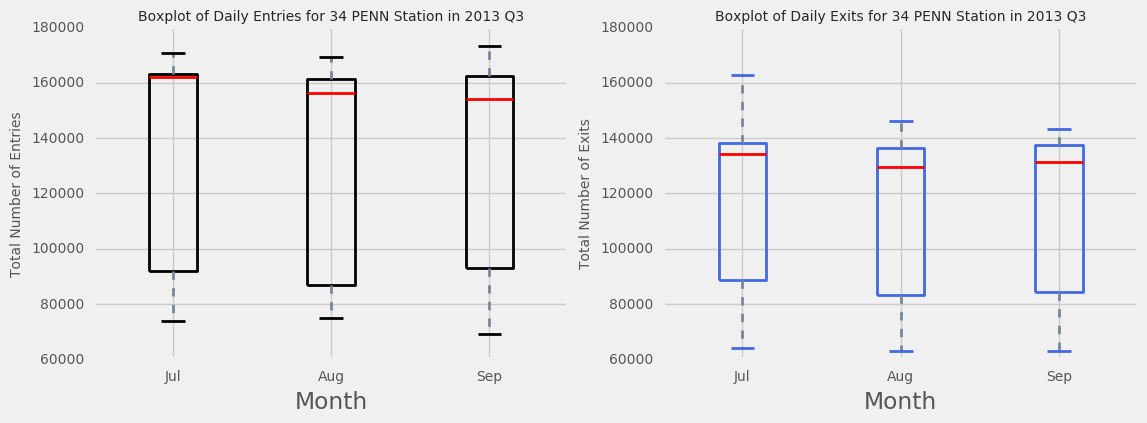

In [1347]:
####### Create boxplot for Entries
plt.subplot(1,2,1)
plt.style.use('fivethirtyeight')
fig = plt.gcf()
fig.set_size_inches(12, 4, forward=True)

bp_Entry = plt.boxplot(data_to_plot_Entries)

# change outline color
for box in bp_Entry['boxes']:
    box.set( color='k', linewidth=2)

# Change color of whisker
for whisker in bp_Entry['whiskers']:
    whisker.set(color='#778899', linewidth=2)

# change linewidth of the caps
for cap in bp_Entry['caps']:
    cap.set(color='k', linewidth=2)

# change color and linewidth of the medians
for median in bp_Entry['medians']:
    median.set(color='r', linewidth=2)

plt.xticks([1,2,3],['Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Total Number of Entries',fontsize = 10)
plt.title('Boxplot of Daily Entries for 34 PENN Station in 2013 Q3', fontsize = 10)

###### Create boxplot for Exits
plt.subplot(1,2,2)
bp_Exit = plt.boxplot(data_to_plot_Exits)

# change outline color
for box in bp_Exit['boxes']:
    box.set( color='#4169E1', linewidth=2)

# Change color of whisker
for whisker in bp_Exit['whiskers']:
    whisker.set(color='#778899', linewidth=2)

# change linewidth of the caps
for cap in bp_Exit['caps']:
    cap.set(color='#4169E1', linewidth=2)

# change color and linewidth of the medians
for median in bp_Exit['medians']:
    median.set(color='r', linewidth=2)

plt.xticks([1,2,3],['Jul','Aug','Sep'])
plt.xlabel('Month')
plt.ylabel('Total Number of Exits', fontsize = 10)
plt.title('Boxplot of Daily Exits for 34 PENN Station in 2013 Q3', fontsize = 10)
plt.show()

The red line indicates the median or the 50th percentile, whereas the lower edge and the upper edge of the boxes are the 25th and 75th percentile respectively.

** Question - 10: Plot the daily number of closed stations and number of stations that were not operating at full capacity in Q3 2013 **

In [1394]:
# Let's group by Station and Date and take mean of Busyness
dfQ3.groupby(['STATION','DATE'])['BUSYNESS'].mean().sort_values()

STATION          DATE      
FRESH POND ROAD  2013-09-22       0.000000
ORCHARD BEACH    2013-07-01       0.000000
238 ST           2013-09-08       0.000000
AQUEDUCT TRACK   2013-07-16       0.000000
BOYD-88 ST       2013-09-29       0.000000
MORGAN AVE       2013-09-08       0.000000
ORCHARD BEACH    2013-08-03       0.000000
SENECA AVE       2013-09-22       0.000000
191 ST           2013-08-18       0.000000
WILSON AVE       2013-09-01       0.000000
VAN ALSTON-21ST  2013-07-14       0.000000
242 ST           2013-09-08       0.000000
SENECA AVE       2013-08-25       0.000000
ORCHARD BEACH    2013-08-22       0.000000
                 2013-08-14       0.000000
AQUEDUCT TRACK   2013-07-20       0.000000
ORCHARD BEACH    2013-08-15       0.000000
VAN ALSTON-21ST  2013-09-29       0.000000
ORCHARD BEACH    2013-08-08       0.000000
                 2013-08-29       0.000000
VAN ALSTON-21ST  2013-08-04       0.000000
ORCHARD BEACH    2013-07-02       0.000000
FOREST AVE       2013-08-2

In [1395]:
# We need to determine a cut-off point for average busyness to determine Closed Stations and Stations operating under 
# lower capacity. 
# Summary Stats can help in this regard
dfQ3.groupby(['STATION','DATE'])['BUSYNESS'].mean().describe()

count    35038.000000
mean       285.278091
std        165.421255
min          0.000000
25%        165.754167
50%        258.736111
75%        380.111111
max       1847.333333
Name: BUSYNESS, dtype: float64

The average busyness is around 285, the maximum value is around 1800 and the lowest value is 0. From this we can assume that the stations that are closed have values below 5 and stations operating under lower capacity have values below 50 and greater than 5.

In [1406]:
# Set cut-off points and filter data

dfQ3_Station_Busyness = dfQ3.groupby(['STATION','DATE'])['BUSYNESS'].mean().reset_index()
df_Closed = dfQ3_Station_Busyness[dfQ3_Station_Busyness['BUSYNESS'] < 5]
df_Low_Capacity = dfQ3_Station_Busyness[(dfQ3_Station_Busyness['BUSYNESS'] >= 5) & 
                                        (dfQ3_Station_Busyness['BUSYNESS'] < 50)]

In [1427]:
# For each day, how many stations are closed?
df_Closed.groupby('DATE')['STATION'].agg('count').head(10)

DATE
2013-07-01    2
2013-07-02    2
2013-07-03    2
2013-07-04    1
2013-07-05    2
2013-07-06    3
2013-07-07    8
2013-07-08    2
2013-07-09    2
2013-07-10    2
Name: STATION, dtype: int64

In [1428]:
# For each day, how many stations are operating under lower capacity?
df_Low_Capacity.groupby('DATE')['STATION'].agg('count').head(10)

DATE
2013-07-01     7
2013-07-02     6
2013-07-03     9
2013-07-04    17
2013-07-05     7
2013-07-06    20
2013-07-07    22
2013-07-08     5
2013-07-09     5
2013-07-10     6
Name: STATION, dtype: int64

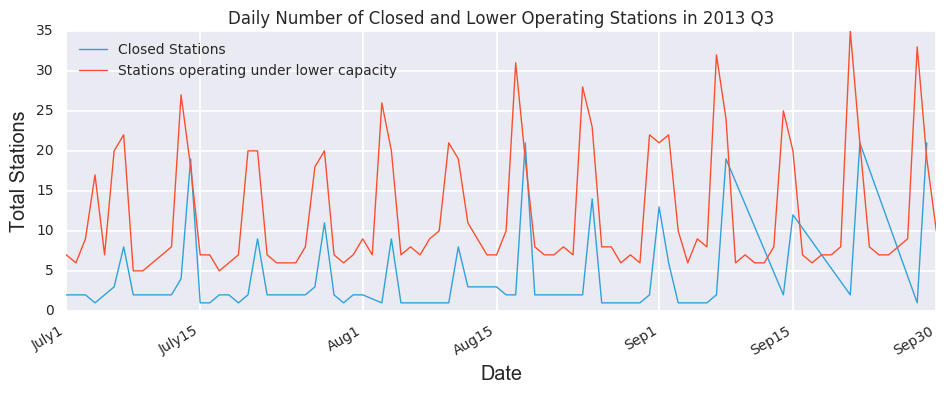

In [1513]:
## Plotting
Closed_Count = df_Closed.groupby('DATE')['STATION'].agg('count')
Low_Capacity_Count = df_Low_Capacity.groupby('DATE')['STATION'].agg('count')

Closed_Count.plot(linewidth= 1, label = 'Closed Stations')
Low_Capacity_Count.plot(linewidth= 1, label = 'Stations operating under lower capacity')
plt.style.use('seaborn-talk')
fig = plt.gcf()
fig.set_size_inches(10, 4, forward=True)
plt.xlabel('Date')
plt.ylabel('Total Stations')
plt.title('Daily Number of Closed and Lower Operating Stations in 2013 Q3', fontsize = 12)
plt.xticks(['07-01-13','07-15-13','08-01-13','08-15-13','09-01-13','09-15-13','09-30-13'], 
                                          ['July1','July15','Aug1','Aug15','Sep1','Sep15','Sep30'], fontsize=10)
plt.yticks(fontsize = 10)
plt.legend(loc='best', fontsize = 10)

plt.show()